## Content
<font color='blue'><a href='#1'>1. Introduction</a></font> 

<font color='blue'><a href='#2'>2. Data Overview</a></font> 
 
<font color='blue'><a href='#3'>3. Logistic Regression</a></font> 

<font color='blue'><a href='#4'>4. KNN similarity model</a></font>
 
<font color='blue'><a href='#5'>5. Random Forest</a></font>
 
<font color='blue'><a href='#6'>6. SVM</a></font> 

<font color='blue'><a href='#7'>7. Gradient Boosting</a></font> 

<font color='blue'><a href='#8'>8. Ridge Classifier</a></font> 

<font color='blue'><a href='#9'>9. Bernoulli/Naive Bayesian classifier</a></font> 

<font color='blue'><a href='#10'>10. Neural Network: Tensorflow</a></font> 

<font color='blue'><a href='#11'>11. Anomaly Detection</a></font> 

    



<font size="6"><a id='1'>1. Introduction</a></font> 

I will be investigating the dataset "Credit Card Fraud". The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation( due to confidentiality issues, they cannot provide the original features). Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')



<font size="6"><a id='2'>2. Data Overview</a></font> 


In [3]:
df = pd.read_csv(filepath_or_buffer = "/home/micah/Desktop/data/creditcard.csv")

print df.head()
print df.info()
print df.isna().sum()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

Looks like there's no missing value in the dataset

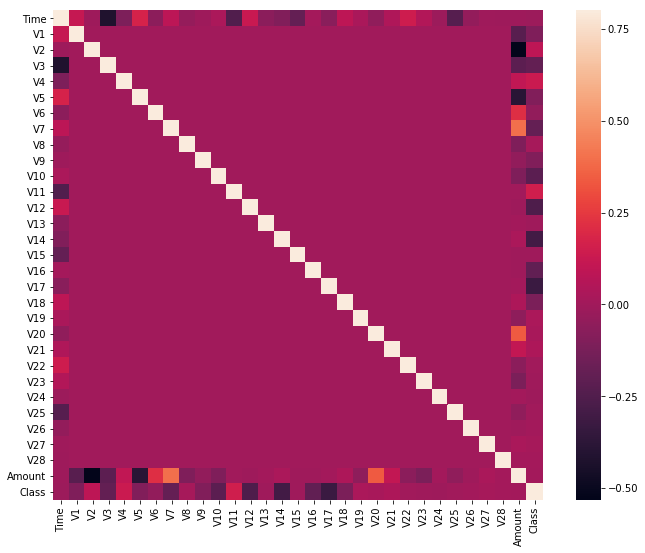

In [3]:
# Make the correlation matrix.
cor = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(cor, vmax=.8, square=True)
plt.show()
# Heatmaps ar

Looks like the correlation between the independent variables or the features are low and that is a good sign!

<font size="6"><a id='3'>3. Logistic regression</a></font> 


In [4]:
# Statsmodel logistic regression

# Declare predictors.
y_statsmod = df['Class']
x_statsmod = df.iloc[:,:-1]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
x_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(y_statsmod, x_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284776
Method:                           MLE   Df Model:                           30
Date:                Sun, 16 Jun 2019   Pseudo R-squ.:                  0.6922
Time:                        15:25:19   Log-Likelihood:                -1114.8
converged:                       True   LL-Null:                       -3621.2
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0

In [5]:
# Calculate accuracy. First, get probability that each row will be a fraud.
pred_statsmod = result.predict(x_statsmod)
print pred_statsmod

# fraud 1 if probability is greater than .5.
pred_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(y_statsmod, pred_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print table.sum().sum()#.iloc[0]
print((table.iloc[0,0] + table.iloc[1,1]) / float(table.sum().sum()))

0         6.299447e-04
1         2.003029e-04
2         3.495181e-04
3         1.472313e-04
4         1.971930e-04
5         1.449841e-04
6         5.519510e-04
7         4.667054e-04
8         2.374541e-04
9         1.146105e-04
10        5.964671e-05
11        1.901861e-04
12        3.955599e-05
13        1.513142e-03
14        1.687237e-03
15        1.043697e-04
16        6.497464e-04
17        1.429813e-04
18        1.279607e-03
19        4.343146e-05
20        2.532104e-04
21        5.933660e-04
22        6.902076e-04
23        9.459918e-04
24        1.238256e-05
25        2.246580e-04
26        4.770405e-04
27        2.099362e-04
28        1.391865e-03
29        5.939646e-04
              ...     
284777    3.198327e-04
284778    4.871661e-04
284779    2.272604e-04
284780    2.089247e-04
284781    6.702510e-05
284782    3.937880e-03
284783    1.345799e-05
284784    2.303508e-04
284785    2.022098e-05
284786    9.456946e-06
284787    2.331267e-04
284788    1.017093e-04
284789    5

In [6]:
#SKlearn logistic regression functionality includes a parameter regularization element that penalizes extremely
# large parameters in the name of increasing predictive accuracy.
lr = LogisticRegression()

y = df['Class']
X = df.iloc[:,:-1]

fit = lr.fit(X, y)

print('Coefficients')
print(fit.coef_)
print('Intercept')
print(fit.intercept_)
pred_y = lr.predict(X)

print('\n Accuracy by admission status\n')
print(pd.crosstab(pred_y, y))

print('\n Percentage accuracy\n')
print(lr.score(X, y))

print(classification_report(pred_y, y))

Coefficients
[[-7.12206575e-05  3.18682793e-01 -4.83850387e-01 -7.93127563e-01
   1.20289540e-01  5.75021683e-02 -5.40495940e-02  3.35171136e-01
  -3.74165961e-01 -3.88332949e-01 -2.06986480e-01 -2.86517603e-01
   1.85123052e-02 -3.06438278e-01 -6.94224243e-01 -4.27600151e-01
  -2.94579466e-01 -4.39702486e-01  3.10746972e-02  2.64950391e-02
   9.19504147e-02  2.48760049e-01  3.50865605e-01  6.76883576e-02
  -2.44272764e-02 -3.56044928e-01  6.07018132e-02 -8.87962032e-02
   2.77870551e-02 -5.58303923e-03]]
Intercept
[-1.62808759]

 Accuracy by admission status

Class       0    1
row_0             
0      284240  203
1          75  289

 Percentage accuracy

0.9990239003957065
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284443
           1       0.59      0.79      0.68       364

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.79      0.90      0.84    284807
weighted avg       1.00      1.00      1.00

Frauds account for 0.172% 

In case if we wanted to use regression to predict a categorical variable with more than two possible outcomes, we use multinomial logistic regression and LogisticRegression from SKlearn can handle multiple classes out-of-the-box.
If want ordinal logistic regression like marathon runners places from 1st to 100th, we can use python MORD package. 


In [7]:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

SyntaxError: invalid syntax (<ipython-input-7-7c4249d5a25f>, line 1)

<font size="6"><a id='4'>4. KNN similarity</a></font> 


KNeighborsClassifier can take longer than other models. So with big data, it can become a bit more time consuming. 
K nearest observations are not all similarly close to the test. In that case it may be useful to weight by distance.

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=1)

df1 = df.loc[:float(len(df)/100),:]
print 'for simplicity reason, we chose 1% of the original data for k neighbours'

y = df1['Class']
X = df1.iloc[:,:-1]
neighbors.fit(X,y)

pred= neighbors.predict(X)

# fraud 1 if probability is greater than .5.
#pred_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(y, pred)

print('\n Accuracy')
print(table)
print('\n Percentage accuracy')
print table.sum().sum()
print((table.iloc[0,0] + table.iloc[1,1]) / float(table.sum().sum()))


from sklearn.model_selection import cross_val_score
score = cross_val_score(neighbors, X, y, cv=4)

print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std()))


In [ ]:
neighbors2 = KNeighborsClassifier(n_neighbors=5,  weights='distance')

neighbors2.fit(X,y)
pred2= neighbors2.predict(X)
table2 = pd.crosstab(y, pred2)

score2 = cross_val_score(neighbors2, X, y, cv=4)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std()))



it is a good idea to represent the outcome in the mesh. However, because the fraud rate is so low compared to the non-fraud cases and the fact that it is computationally expensive, it is not a good idea in this specific case. I have tried to do it and I've got a MemoryError

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=2, weights='distance')
df1 = df.loc[:float(len(df)/500),:]
#print 'for simplicity reason, we chose 1% of the original data for k neighbours meshing'

y = df1['Class']
X = df1.iloc[:,:-1]

neighbors.fit(X, y)

X = np.array(X)
Y = np.array(y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
print len(xx.ravel() )
print len(yy.ravel() )
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('')
plt.ylabel('')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


<font size="6"><a id='5'>5. Random Forest</a></font> 


# Decision Trees
With Decision Tree, we ask a series of questions to gain information about the data, narrowing down the possible number of questions each time. To be efficient, we use Entropy(disorder) and here it will mean uncertainty. It can be defined, using Shannon Entropy 𝐻

$$ H = -\sum_{i=1}^n P(x_i)log_2 P(x_i) $$

So the idea of which node need to be explored more is based on entropy number. With the entropy score of 1 being the most uncertain, 0 being totally certain, we decide what we explore more to mazximize information gain. 


In [ ]:
# This is the model we'll be using.
from sklearn import tree


# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.

import pydotplus
import graphviz

customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print 'Here is an example of rendering tree. '

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [ ]:
# Initialize and train our tree.
y = df['Class']
X = df.iloc[:,:-1]
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


There is not a hard and fast rule to how the tree is built, so it doesn't build the same way every time. You saw this above when we discussed the random_state argument. In addition, they are incredibly prone to overfitting, particularly if you allow them to grow too deep or complex. Also note that because they are working from information gain, they are biased towards the dominant class, so balanced data is needed.

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

score = cross_val_score(rfc, X, y, cv=4)
print (score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score2.std()))


<font size="6"><a id='6'>6. Support Vector Machine</a></font> 


 In SVM, all the classes are bounded by a line! Boundary line passing close to data points is bad because it'll be susceptable to noise and be worse at predicting new data points than a boundary line farther away. The margin as the distance between the nearest point of each class in the boundary. The goal of SVM is find the best boundary, or the boundary that optimizes the margin.
 
 SVM's primary advantage is its flexibility. It can have great visual explanatory power (linear SVC), tremendous accuracy (kernel smoothing), clustering (SVClustering), or the ability to control the specificity of training (SVR). 

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X, y)

In [ ]:
# Visualize our model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()

In [ ]:
#plt.scatter(y, svr.predict(X))

from sklearn.model_selection import cross_val_score

print cross_val_score(svr, X, y, cv=5)

<font size="6"><a id='7'>7. Gradient Boosting</a></font> 

Boosting Models, models the data over and over, each time adjusting the model based on what was learned from the previous one. The principle behind boosting is iterative. We start by fitting a simple model on all the data. We identify the information that the model was not able to account for (incorrect predictions in classifier, and residuals in regression) and build a new simple model that targets that new pool of information. We repeat this until we reach some predetermined stopping rule.  The combination of all the models is then used to make the final predictions

The regression model is fitted by moving down the steepest 'downhill' gradient until we reach the lowest point of the surface, where all possible gradients are 'uphill.' The final model is made up of the parameter estimates that define that location on the surface.

The loss function to minimize is the sum of the squared residuals:

$$\frac1{n}\sum_{i=1}^n(y_i-(\alpha + \beta x_i))^2$$

In [ ]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import scipy


In [ ]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [ ]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<font size="6"><a id='8'>8. Ridge Classifier</a></font> 

**Ridge regression** minimizes this cost function:

$$\sum_{i=1}^n(y_i-(\alpha+\beta x_i))^2+\lambda\sum_{j=1}^p\beta_j^2 $$

Comparing this cost function to the OLS cost function above, you can see it consists of the OLS function with a new part to the right:

$$\lambda\sum_{j=1}^p\beta_j^2 $$


In [ ]:
from sklearn import linear_model


In [ ]:
regr1 = linear_model.LinearRegression()
#Y_train = #df_train['income'].values.reshape(-1, 1)
#X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regr1.fit(X, y)
print('\nR-squared simple model:')
print(regr1.score(X, y))

In [ ]:
ridgeregr = linear_model.RidgeClassifier(alpha=10, fit_intercept=True) 
ridgeregr.fit(X, y)
print(ridgeregr.score(X, y))


<font size="6"><a id='9'>9. Naive Bayesian</a></font> 

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

print(bnb.score(X, y))

'''
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
'''